In [ ]:
import zipfile
import os
#Mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
happy/PublicTest_10181609.jpg
happy/PrivateTest_89947622.jpg
happy/PrivateTest_92780348.jpg
happy/PrivateTest_928647.jpg
happy/PrivateTest_89422372.jpg
happy/PrivateTest_81433022.jpg
happy/PrivateTest_99691745.jpg
happy/PrivateTest_95500948.jpg
happy/PrivateTest_85826121.jpg
happy/PrivateTest_89236972.jpg
happy/PrivateTest_95444722.jpg
happy/PrivateTest_81947519.jpg
happy/PrivateTest_82161877.jpg
happy/PrivateTest_91362648.jpg
happy/PrivateTest_88760955.jpg
happy/PrivateTest_84590897.jpg
happy/PublicTest_12481108.jpg
happy/PrivateTest_85186343.jpg
happy/PrivateTest_95304700.jpg
happy/PrivateTest_92514405.jpg
happy/PrivateTest_81512221.jpg
happy/PrivateTest_9668583.jpg
happy/PrivateTest_92171408.jpg
happy/PrivateTest_98023411.jpg
happy/PrivateTest_95094.jpg
happy/PrivateTest_87605200.jpg
happy/PrivateTest_96395145.jpg
happy/PrivateTest_87876677.jpg
happy/PrivateTest_82392713.jpg
happy/PrivateTest_97244254.jpg
happy/PublicTest_1052

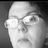

-1

In [ ]:
#Import libraries
import numpy as np
import tensorflow as tf
import cv2
import os
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications import VGG19
#Mount drive
#from google.colab import drive
#drive.mount('/content/gdrive')

train_path = "/content/gdrive/MyDrive/Emotion_detection_using_video /Dataset/train"
test_path  = "/content/gdrive/MyDrive/Emotion_detection_using_video /Dataset/test"

folderList = os.listdir(train_path)
folderList.sort()

print(folderList)

x_train=[]
y_train=[]

x_test=[]
y_test=[]

#load the train data into arrays
for i, category in enumerate(folderList):
  files=os.listdir(os.path.join(train_path, category))
  for file in files:
    print(category + "/" +file)
    img = cv2.imread(os.path.join(train_path, category, file))
    x_train.append(img)
    y_train.append(i)


# Do the same with the test data
#load the test data into arrays
for i, category in enumerate(folderList):
  files=os.listdir(os.path.join(test_path, category))
  for file in files:
    print(category + "/" +file)
    img = cv2.imread(os.path.join(test_path, category, file))
    x_test.append(img)
    y_test.append(i)

print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))
#show the first image
cv2_imshow(x_train[0])
cv2.waitKey(0)


In [ ]:
#Convert the data to numpy
x_train=np.array(x_train)
y_train=np.array(y_train)

x_test=np.array(x_test)
y_test=np.array(y_test)

#Check
print(x_train.shape)     #(28709, 48, 48, 3) ,28709:  number of images , 48x48, 3: number of color channels RGB
#print(x_train[0])
print(x_test.shape)

(28709, 48, 48, 3)
(7178, 48, 48, 3)


In [ ]:
#Normalize the image 0 to 1 to reduce memory load
x_train=x_train/255
x_test=x_test/255

#Add another dimension to the data (28709, 48, 48, 1) using reshape
numberOfImages=x_train.shape[0]
#x_train=x_train.reshape(numberOfImages, 48, 48, 1)       #1: gray image

numberOfImages=x_test.shape[0]
#x_test=x_test.reshape(numberOfImages, 48, 48, 1)

#check
print(x_train[0])
print(x_train.shape)


[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]]

 [[0.19215686 0.19215686 0.19215686]
  [0.2        0.2        0.2       ]
  [0.20392157 0.20392157 0.20392157]
  ...
  [0.10588235 0.10588235 0.10588235]
  [0.10980392 0.10980392 0.10980392]
  [0.11764706 0.11764706 0.11764706]]

 [[0.27058824 0.27058824 0.27058824]
  [0.2745098  0.2745098  0.2745098 ]
  [0.27843137 0.27843137 0.27843137]
  ...
  [0.05098039 0.05098039 0.05098039]
  [0.06666667 0.06666667 0.06666667]
  [0.07843137 0.07843137 0.07843137]]

 ...

 [[0.25490196 0.25490196 0.25490196]
  [0.25098039 0.25098039 0.25098039]
  [0.2627451  0.2627451  0.2627451 ]
  ...
  [0.1372549  0.1372549  0.1372549 ]
  [0.16862745 0.16862745 0.16862745]
  [0.21176471 0.21176471 0.21176471]]

 [[0.24313725 0.24313725 0.24313725]
  [0.23921569 0.23921569 0.23921569]


In [ ]:
# convert the labels to categorical (one hot encoding)
#from keras.utils import np_utils
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes=7)

# Reshape y_train and y_test if necessary, fixx
y_train = y_train.reshape(-1, 7)
y_test = y_test.reshape(-1, 7)


print(y_train)
print(y_train.shape)
#print(y_train[0])
print(y_test)
print(y_test.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(28709, 7)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(7178, 7)


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Khởi tạo model VGG19
input_shape = x_train.shape[1:]
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Đóng băng các lớp của base model
for layer in base_model.layers:
  layer.trainable = False

# Thêm các lớp fully connected
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Biên dịch model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện model
batch = 32
epochs = 20
steps_per_epoch = np.ceil(len(x_train) / batch)
validation_steps = np.ceil(len(x_test) / batch)
stop_early = EarlyStopping(monitor='val_accuracy', patience=5)

history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, verbose=1, validation_data=(x_test, y_test), shuffle=True, callbacks=[stop_early])

In [ ]:
# build your model

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

input_shape = x_train. shape[1:] #input shape (48,48,3)
print (input_shape )
# Block 1
model = Sequential ()
model.add (Conv2D (input_shape=input_shape, filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add (Conv2D (filters=64, kernel_size=(3,3) , padding="same", activation="relu"))
model.add (MaxPooling2D (pool_size=(2,2), strides=(2, 2) ))

# Block 2
model.add (Conv2D (filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add (Conv2D (filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add (MaxPooling2D (pool_size=(2,2), strides= (2, 2)))

# Block 3
model.add (Conv2D (filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add (Conv2D (filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add (Conv2D (filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add (MaxPooling2D (pool_size=(2,2), strides= (2, 2)))

# Block 4
model.add (Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add (Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add (Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add (MaxPooling2D (pool_size=(2,2), strides= (2, 2)))

# Block 5
model.add (Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add (Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add (Conv2D (filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# Global avg pooling
model.add (GlobalAveragePooling2D ())


# Classification layers
model.add(Flatten())
model.add (Dense (units=4096, activation="relu"))
model.add (Dense (units=7, activation="softmax"))

print(model.summary())




(48, 48, 3)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │          28,6

 Total params: 16,844,615 (64.26 MB)

 Trainable params: 16,844,615 (64.26 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/16
898/898 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.2436 - loss: 1.8332 - val_accuracy: 0.3002 - val_loss: 1.7286
Epoch 2/16
898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 52ms/step - accuracy: 0.3224 - loss: 1.6531 - val_accuracy: 0.4267 - val_loss: 1.4407
Epoch 3/16
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.4353 - loss: 1.4117 - val_accuracy: 0.4752 - val_loss: 1.3354
Epoch 4/16
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.4914 - loss: 1.2839 - val_accuracy: 0.5086 - val_loss: 1.2553
Epoch 5/16
898/898 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.5508 - loss: 1.1572 - val_accuracy: 0.5401 - val_loss: 1.1997
Epoch 6/16
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.5891 - loss: 1.0737 - val_accuracy: 0.5489 - val_loss: 1.1919
Epoch 7/16
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.6271 - loss: 0.9814 - val_accuracy: 0.5641 - val_loss: 1.1611
Epoch 8/16
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.6618 - loss: 0.8990 - 

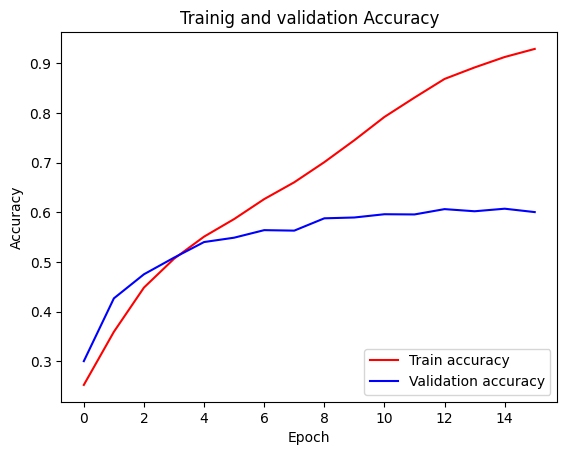

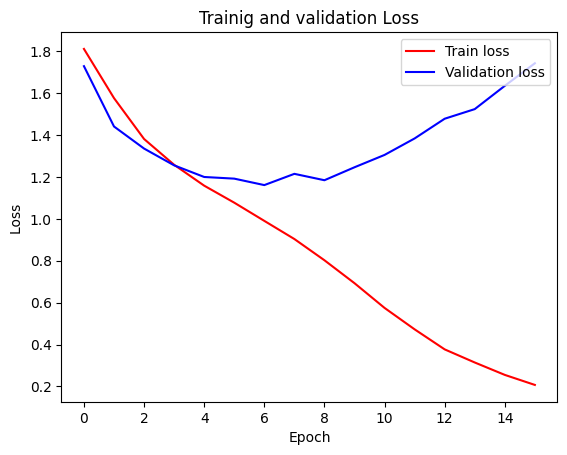

In [ ]:
#Compile your model
model.compile (optimizer=Adam (learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy' ])
batch=32
epochs=16

stepsPerEpoch   = np.ceil(len (x_train) /batch)
validationSteps = np.ceil(len (x_test) /batch)
stopEarly = EarlyStopping (monitor='val_accuracy', patience = 5)

# train the model
history = model.fit(x_train,
                    y_train,
                    batch_size=batch,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test,y_test) ,
                    shuffle=True,
                    callbacks=[stopEarly] )

# show the result based on pyplot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy' ]
loss = history.history['loss']
val_loss = history.history['val_loss' ]

#show the charts
epochs = range (len(acc))

# show train and validation train chart
plt.plot (epochs, acc ,'r' , label="Train accuracy")
plt.plot (epochs, val_acc, 'b', label="Validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title ("Trainig and validation Accuracy")
plt.legend (loc='lower right')
plt.show()
# show loss and validation loss chart
plt .plot (epochs, loss,'r', label="Train loss")
plt.plot (epochs, val_loss , 'b' , label="Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss ')
plt.title ("Trainig and validation Loss")
plt.legend (loc='upper right')
plt.show ()

# save model structure in json file

# save the model weights in h5 file
model.save('/content/gdrive/MyDrive/EEG_project/Emotion_detection_using_video /Model/emotion_model2.h5')

Confusion matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

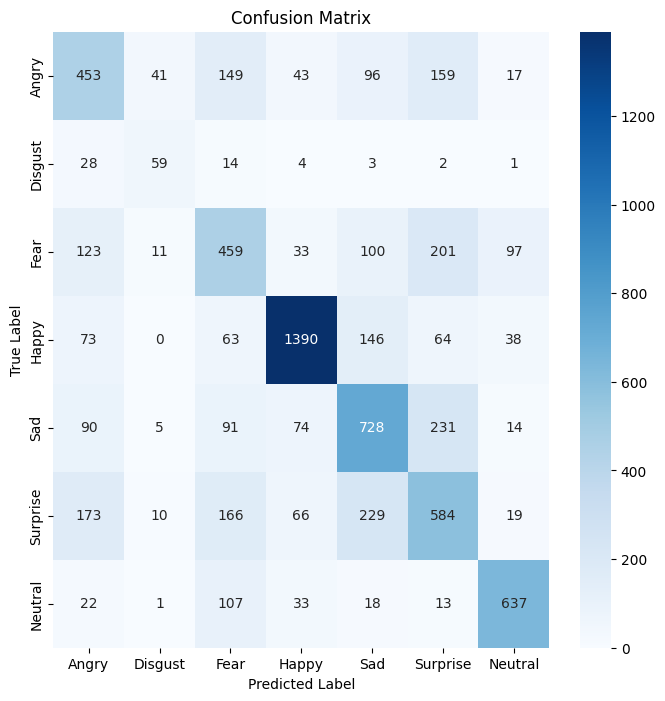

In [ ]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()